In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

In [85]:
dfx = pd.read_csv('./Datasets/xdata.csv')
dfy = pd.read_csv('./Datasets/ydata.csv')

In [87]:
dfx.shape

(399, 3)

In [89]:
x = dfx.values
y = dfy.values

In [91]:
print(x)

[[ 1.00000000e+00  3.51627900e+00  3.71975047e+00]
 [ 2.00000000e+00  4.60649561e+00  3.41437943e+00]
 [ 3.00000000e+00  4.67701056e+00  3.04724443e+00]
 ...
 [ 3.97000000e+02  7.89625683e-01  9.31669806e-01]
 [ 3.98000000e+02 -1.00253042e+00 -6.76162472e-01]
 [ 3.99000000e+02  2.92386778e-01  5.61177823e-01]]


In [93]:
x = x[:, 1:]
y = y[:, 1:]
y = y.reshape((-1, ))

In [95]:
print(y)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

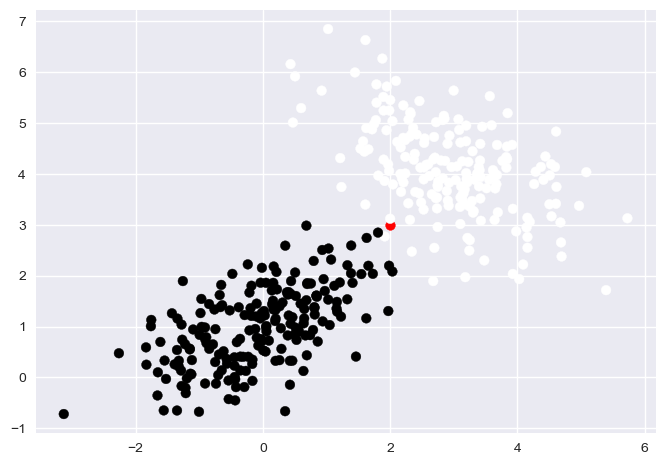

In [107]:
query = np.array([2, 3])
plt.scatter(query[0], query[1], c='red')
plt.scatter(x[:, 0], x[:, 1], c=y)

In [123]:
# Find K-Nearest Neightbours based on distance
def distance(x1, x2):
    return np.sqrt(sum((x1-x2)**2))

In [157]:
def knn(x, y, querypoint, k = 5):
    # K Nearest Neighbours
    vals = []
    # get distance for every x
    for i in range(x.shape[0]):
        d = distance(querypoint, x[i])
        vals.append((d, y[i]))
    # print(vals)
    # sorted vals and finf k nearest points
    vals = sorted(vals)
    vals = vals[:k]
    # majority vote
    vals = np.array(vals)
    new_values = np.unique(vals[:, 1],return_counts=True)
    print(new_values)
    index = new_values[1].argmax()
    pred = new_values[0][index]
    return pred

In [159]:
print(knn(x, y, [0,1]))

(array([1.]), array([5], dtype=int64))
1.0
